# SpaceX Falcon 9 First Stage Landing Prediction: Machine Learning

## Objectives
- Create a column for the class
- Standardize the data
- Split into training and test data
- Machine Learning modeling

### Import libraries and define auxiliary functions

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# Display all columns of a dataframe
pd.set_option("display.max_columns", None)
# Display all of the data in a feature
pd.set_option("display.max_colwidth", None)

import warnings
warnings.filterwarnings("ignore")

In [28]:
# This function is to plot the confusion matrix
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Unsuccess', 'Success']); ax.yaxis.set_ticklabels(['Unsuccess', 'Success']) 
    plt.show() 

### Load the dataframe and explore

In [5]:
# Import the dataset
raw_data = pd.read_csv("spacex_dataset_cleaned.csv")
X_data = pd.read_csv("spacex_dataset_cleaned_one_hot.csv")

In [6]:
X_data.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCSFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,Serial_B0003,Serial_B0005,Serial_B0007,Serial_B1003,Serial_B1004,Serial_B1005,Serial_B1006,Serial_B1007,Serial_B1008,Serial_B1010,Serial_B1011,Serial_B1012,Serial_B1013,Serial_B1015,Serial_B1016,Serial_B1017,Serial_B1018,Serial_B1019,Serial_B1020,Serial_B1021,Serial_B1022,Serial_B1023,Serial_B1025,Serial_B1026,Serial_B1028,Serial_B1029,Serial_B1030,Serial_B1031,Serial_B1032,Serial_B1034,Serial_B1035,Serial_B1036,Serial_B1037,Serial_B1038,Serial_B1039,Serial_B1040,Serial_B1041,Serial_B1042,Serial_B1043,Serial_B1044,Serial_B1045,Serial_B1046,Serial_B1047,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Define the label
y = raw_data["Class"].to_numpy()

In [16]:
len(y)

90

### Standardize the X_data and split dataset

In [11]:
# Standardize the X_data
X_data = StandardScaler().fit_transform(X_data)
X_data

array([[-1.71291154e+00, -1.23358114e-18, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.67441914e+00, -1.18972425e+00, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [-1.63592675e+00, -1.15742336e+00, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       ...,
       [ 1.63592675e+00,  2.01380177e+00,  3.49060516e+00, ...,
        -2.15665546e-01, -1.85695338e-01, -1.05999788e-01],
       [ 1.67441914e+00,  2.01380177e+00,  1.00389436e+00, ...,
        -2.15665546e-01,  5.38516481e+00, -1.05999788e-01],
       [ 1.71291154e+00, -5.19055717e-01, -6.53912840e-01, ...,
        -2.15665546e-01, -1.85695338e-01,  9.43398113e+00]])

In [12]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((72, 80), (18, 80), (72,), (18,))

### Logistic Regression

In [52]:
# Define the parameters
parameters = {'C':[0.01,0.1,1],
              'penalty':['l2'],
              'solver':['lbfgs']}

In [53]:
# Parameters tuning
lr = LogisticRegression()

# Cross validation with 10 fold
lr_cv = GridSearchCV(lr, parameters, cv=10)
lr_cv.fit(X_data, y)

print("Tuned Hyperparameters: ", lr_cv.best_estimator_)
print("Accuracy:", lr_cv.best_score_)

Tuned Hyperparameters:  LogisticRegression(C=0.1)
Accuracy: 0.8222222222222222


In [54]:
print("Score on Training Data: ", lr_cv.score(X_train, y_train))
print("Score on Test Data: ", lr_cv.score(X_test, y_test))

Score on Training Data:  0.9722222222222222
Score on Test Data:  0.9444444444444444


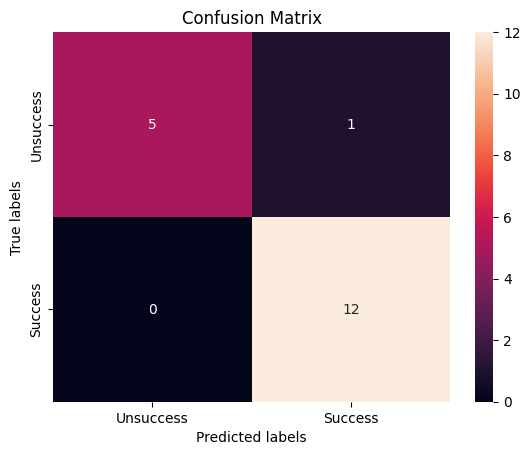

In [55]:
# Plot the confusion matrix
y_hat = lr_cv.predict(X_test)
plot_confusion_matrix(y_test, y_hat)

### SVM

In [56]:
# Define the parameters
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

In [57]:
# Parameters tuning
svm = SVC()

# Cross validation with 10 fold
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_data, y)

print("Tuned Hyperparameters: ", svm_cv.best_estimator_)
print("Accuracy:", svm_cv.best_score_)

Tuned Hyperparameters:  SVC(gamma=0.03162277660168379, kernel='sigmoid')
Accuracy: 0.8333333333333334


In [58]:
print("Score on Training Data: ", svm_cv.score(X_train, y_train))
print("Score on Test Data: ", svm_cv.score(X_test, y_test))

Score on Training Data:  0.9027777777777778
Score on Test Data:  0.9444444444444444


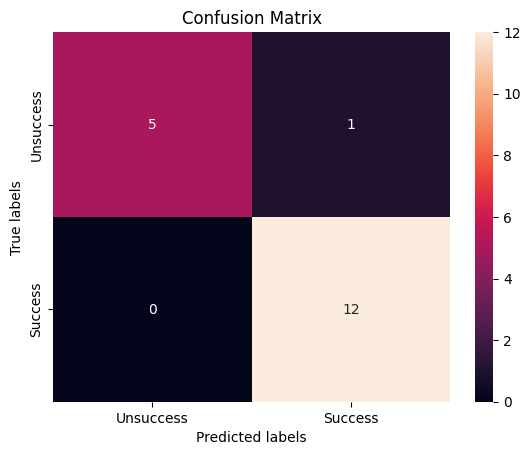

In [59]:
# Plot the confusion matrix
y_hat = svm_cv.predict(X_test)
plot_confusion_matrix(y_test, y_hat)

### Decision Tree

In [68]:
# Define the parameters
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1,10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

In [69]:
# Parameters tuning
dt = DecisionTreeClassifier()

# Cross validation with 10 fold
dt_cv = GridSearchCV(dt, parameters, cv=10)
dt_cv.fit(X_data, y)

print("Tuned Hyperparameters: ", dt_cv.best_estimator_)
print("Accuracy:", dt_cv.best_score_)

Tuned Hyperparameters:  DecisionTreeClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=2)
Accuracy: 0.8666666666666666


In [70]:
print("Score on Training Data: ", dt_cv.score(X_train, y_train))
print("Score on Test Data: ", dt_cv.score(X_test, y_test))

Score on Training Data:  0.875
Score on Test Data:  0.8888888888888888


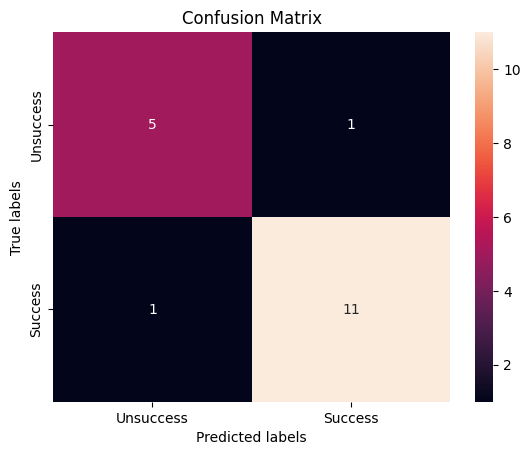

In [71]:
# Plot the confusion matrix
y_hat = dt_cv.predict(X_test)
plot_confusion_matrix(y_test, y_hat)

### K-Nearest Neighbors

In [64]:
# Define the parameters
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

In [65]:
# Parameters tuning
knn = KNeighborsClassifier()

# Cross validation with 10 fold
knn_cv = GridSearchCV(knn, parameters, cv=10)
knn_cv.fit(X_data, y)

print("Tuned Hyperparameters: ", knn_cv.best_estimator_)
print("Accuracy:", knn_cv.best_score_)

Tuned Hyperparameters:  KNeighborsClassifier(n_neighbors=8, p=1)
Accuracy: 0.8


In [66]:
print("Score on Training Data: ", knn_cv.score(X_train, y_train))
print("Score on Test Data: ", knn_cv.score(X_test, y_test))

Score on Training Data:  0.8333333333333334
Score on Test Data:  0.8888888888888888


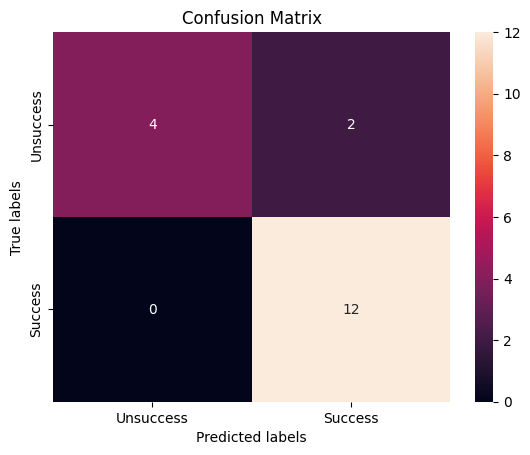

In [67]:
# Plot the confusion matrix
y_hat = knn_cv.predict(X_test)
plot_confusion_matrix(y_test, y_hat)

Based on the models trained on the dataset, Logistic Regression and SVM obtained the highest score on the test set using the cross validation and fine-tuned hyperparameters.